# BudgetTracker
The BudgetTracker allows you to keep track of your account balance and how much you spend on different budget categories. The budget categories are Housing, Food, Car, Clothing, Entertainment, and Other.

### Functionality
- Specificy the starting balance when you create a new BudgetTracker. The starting balance will then be allocated to the different budget categories.
- View the current balance of the account and the balances of each budget category.
- Keep track of withdrawals from the account and assign each withdrawal to a budget category.
- Keep track of deposits to the account and allocate the deposited amount across the budget categories.
- Log every withdrawal and deposit in the transactions notebook and save the notebook to a csv file.
- Track budgets for multiple accounts.

## Create an new BudgetTracker
In real life, every time I have set up a new budget, I have started with an account that already has money in it. The BudgetTracker allows you to set the starting balance when you create an account. Let's create a new account with an initial balance of $1,259.30. We also specify the start date in the format 'YYYY-MM-DD'. 

The transaction notebook will keep track of all of our deposits and withdrawls. When we create a new BudgetTracker, we enter a name for the transactions notebook. The BudgetTracker will check whether a csv file with that name already exists in the project folder. If it does not, the BudgetTracker will create a new transaction notebook under that name and save it to a csv file. If a csv file with that name already exists in the project folder, the BudgetTracker will ask us if we want to use that file as our transactions notebook. If we say no, then we will be given the option to choose a new name and the BudgetTracker will create a new transactions notebook.

In [1]:
from helpers import BudgetTracker
checking = BudgetTracker(starting_balance=1259.30, 
                       start_date='2020-01-05', 
                       transactions_notebook_name = 'checking')

checking.csv already exists. Do you want to use this file as your transactions notebook? (y/n): y


## View the current balance
When we start an account, the initial balance is allocated to the budget categories as follows: 30% goes into the Housing category, 20% into Food, 25% into Car, 10% into Clothing, 10% into Entertainment, and the remaining amount, roughly 5% goes into the Miscellaneous category. Now that we have an account, we can view the balance.

In [2]:
checking.show_balance()

TOTAL BALANCE: $1,259.30
-------------------------
housing balance: $314.82
insurance balance: $125.93
food balance: $125.93
transportation balance: $125.93
utilities balance: $125.93
savings balance: $125.93
entertainment balance: $125.93
clothing balance: $62.97
miscellaneous balance: $125.93


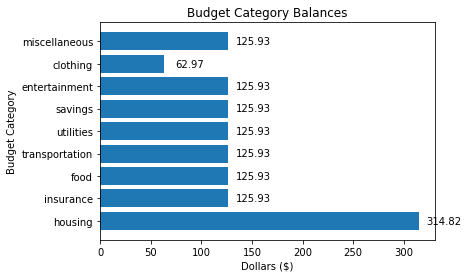

In [3]:
checking.show_balance_barchart()

## Budget allocations
We can view a pie chart that shows how the balance is assigned to budget categories.

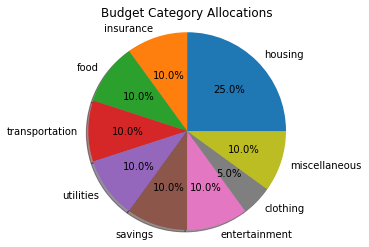

In [4]:
checking.show_budget_pie_chart()

## Transactions notebook
The transactions notebook, checking.transactions, keeps track of all of your transacation. To start with, the notebook will only list the current balance. Everytime you make a deposit or withdrawal the transaction will be recorded in the notebook and the notebook will be saved as a csv file. For those of you familiar with Pandas, checking.transactions is a Pandas DataFrame. If you aren't familiar with Pandas, don't worry about this.

In [5]:
checking.show_transactions_notebook()

TRANSACTIONS NOTEBOOK:
-------------------------
  transaction_date  transaction_type budget_category  transaction_amount  \
0       2020-01-05  starting balance            none                   0   

   current_balance  
0           1259.3  


## Make a withdrawal
When you spend money, you can log the expense as a withdrawal from your account with checking.withraw(). You enter the date of the withdrawal, which budget category you wish to use, and the withdrawal amount. The withdrawal amount will be subtracted from the total balance and the balance of the specified budget category. The transaction will be logged in the check register.

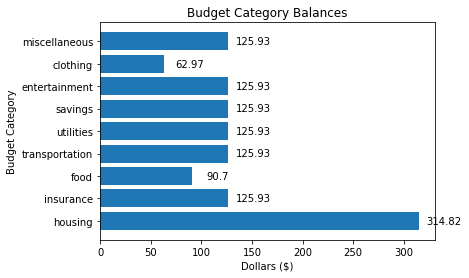

In [6]:
checking.withdraw(withdrawal_date = '2020-01-08', withdrawal_category='food', withdrawal_amount=35.23)
checking.show_balance_barchart()

In [7]:
checking.show_transactions_notebook()

TRANSACTIONS NOTEBOOK:
-------------------------
  transaction_date  transaction_type budget_category  transaction_amount  \
0       2020-01-05  starting balance            none                0.00   
0       2020-01-08        withdrawal            food               35.23   

   current_balance  
0          1259.30  
0          1224.07  


## Make a deposit
Make a deposit to the account with checking.deposit(). Enter the deposit date and amount. The deposit amount will be added to the total balance of the account and divided among the budget categories using checking.allocations.

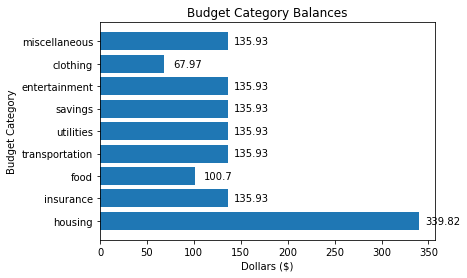

In [8]:
checking.deposit(deposit_date = '2020-01-09', deposit_amount=100.00)
checking.show_balance_barchart()

In [9]:
checking.show_transactions_notebook()

TRANSACTIONS NOTEBOOK:
-------------------------
  transaction_date  transaction_type budget_category  transaction_amount  \
0       2020-01-05  starting balance            none                0.00   
0       2020-01-08        withdrawal            food               35.23   
0       2020-01-09           deposit             all              100.00   

   current_balance  
0          1259.30  
0          1224.07  
0          1324.07  


## Change the budget categories and allocation amounts
We can change the budget categories and allocation amounts with checking.change_budget() by specifying a new budget as a Python dictionary. The new budget need to meet the following requirements:
- Each allocation amount needs to be a decimal between 0 and 1. For example, if you want to assign 10% of the balance to housing, the allocation amount would be 0.1
- All of the allocation amounts need to sum up to 1. 

The new budget has been set and the current balance has been reallocated to the budget categories accordingly. Here are the new budget category balances:


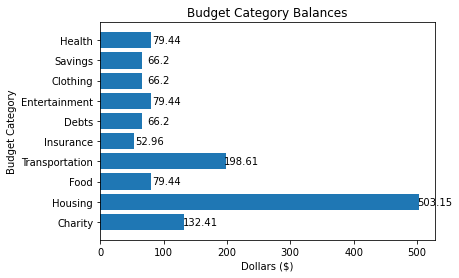

In [10]:
new_budget = {'Charity': 0.1, 'Housing': 0.38, 'Food': 0.06, 'Transportation': 0.15, 'Insurance': 0.04, 
              'Debts': 0.05, 'Entertainment': 0.06, 'Clothing': 0.05, 'Savings': 0.05, 'Health': 0.06 }
checking.change_budget(budget_dict=new_budget)

## Future functionality
- Incorporate testing.
- The current version requires that dates be in the ISO standard format: 'YYYY-MM-DD.' Add functionality to allow users to enter dates in other formats. E.g. '10-05-20', '10/05/20', 'Aug. 10, 20'.
- Create graphs of spending by budget category and month.